<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d rm1000/brain-tumor-mri-scans

Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans
License(s): CC0-1.0
 97% 228M/236M [00:01<00:00, 149MB/s]
100% 236M/236M [00:01<00:00, 160MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-scans.zip

Streaming output truncated to the last 5000 lines.
  inflating: healthy/0402.jpg        
  inflating: healthy/0403.jpg        
  inflating: healthy/0404.jpg        
  inflating: healthy/0405.jpg        
  inflating: healthy/0406.jpg        
  inflating: healthy/0407.jpg        
  inflating: healthy/0408.jpg        
  inflating: healthy/0409.jpg        
  inflating: healthy/0410.jpg        
  inflating: healthy/0411.jpg        
  inflating: healthy/0412.jpg        
  inflating: healthy/0413.jpg        
  inflating: healthy/0414.jpg        
  inflating: healthy/0415.jpg        
  inflating: healthy/0416.jpg        
  inflating: healthy/0417.jpg        
  inflating: healthy/0418.jpg        
  inflating: healthy/0419.jpg        
  inflating: healthy/0420.jpg        
  inflating: healthy/0421.jpg        
  inflating: healthy/0422.jpg        
  inflating: healthy/0423.jpg        
  inflating: healthy/0424.jpg        
  inflating: healthy/0425.jpg        
  inflating: healthy/0426.jpg        

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
import os
import shutil
import random

# Define your directories
base_dir = '/content'
classes = ['healthy', 'glioma', 'meningioma', 'pituitary']

# Create train and test directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split ratio
train_ratio = 0.8

# Loop over each class to split the data
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    all_files = os.listdir(cls_dir)

    # Shuffle the files to ensure randomness
    random.shuffle(all_files)

    # Calculate split index
    split_index = int(len(all_files) * train_ratio)
    train_files = all_files[:split_index]
    test_files = all_files[split_index:]

    # Create class-specific directories in train and test folders
    train_cls_dir = os.path.join(train_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir, exist_ok=True)

    # Move files to train and test directories
    for file_name in train_files:
        src_path = os.path.join(cls_dir, file_name)
        dest_path = os.path.join(train_cls_dir, file_name)
        shutil.move(src_path, dest_path)

    for file_name in test_files:
        src_path = os.path.join(cls_dir, file_name)
        dest_path = os.path.join(test_cls_dir, file_name)
        shutil.move(src_path, dest_path)

print("Data split into train and test sets successfully.")

Data split into train and test sets successfully.


In [ ]:
os.makedirs('/content/train/healthy', exist_ok=True)
os.makedirs('/content/train/glioma', exist_ok=True)
os.makedirs('/content/train/meningioma', exist_ok=True)
os.makedirs('/content/train/pituitary', exist_ok=True)
os.makedirs('/content/test/healthy', exist_ok=True)
os.makedirs('/content/test/glioma', exist_ok=True)
os.makedirs('/content/test/meningioma', exist_ok=True)
os.makedirs('/content/test/pituitary', exist_ok=True)

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                batch_size = 32,
                                                                image_size = (256, 256),
                                                                label_mode = 'categorical',
                                                                seed = 42)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = 32,
                                                                label_mode = "categorical",
                                                                image_size = (256, 256),
                                                                shuffle = False)

Found 5617 files belonging to 4 classes.
Found 1406 files belonging to 4 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (256, 256, 3)),
    tf.keras.layers.Conv2D(filters = 8,
                          kernel_size = 3,
                          padding = 'same',
                          activation = 'relu',
                          kernel_initializer = 'he_normal',
                          kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           padding = 'same',
                           activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           padding = 'same',
                           activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           padding = 'same',
                           activation = 'relu',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data,
                    validation_data = test_data,
                    epochs = 8)

Epoch 1/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9885 - loss: 1.5661 - val_accuracy: 0.9182 - val_loss: 2.5521
Epoch 2/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9981 - loss: 1.4772 - val_accuracy: 0.9189 - val_loss: 2.6619
Epoch 3/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9961 - loss: 1.4683 - val_accuracy: 0.9061 - val_loss: 3.0629
Epoch 4/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9969 - loss: 1.4464 - val_accuracy: 0.9054 - val_loss: 3.1086
Epoch 5/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9902 - loss: 1.4420 - val_accuracy: 0.8805 - val_loss: 3.6556
Epoch 6/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9904 - loss: 1.4689 - val_accuracy: 0.9132 - val_loss: 2.5786
Epoch 7/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9894 - loss: 1.4440 - val_accuracy: 0.9282 - val_loss: 2.6343
Epoch 8/8
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.9853 - loss: 1.4870 - val_ac

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

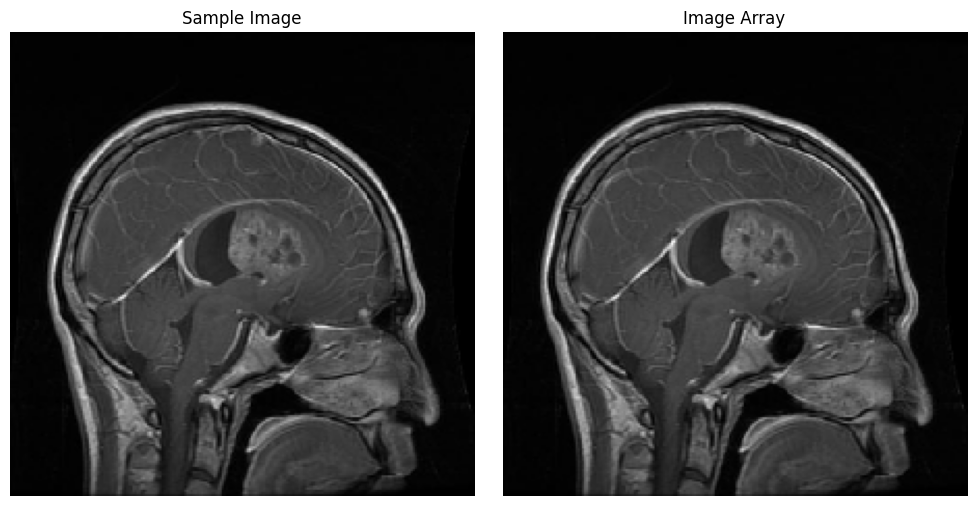

In [ ]:

img_path = '/content/test/glioma/0002.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = img_array.astype('uint8')


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Sample Image')
plt.subplot(1, 2, 2)
plt.imshow(img_array)
plt.axis('off')
plt.title('Image Array')

plt.tight_layout()
plt.show()